### Group Prject - London Bike Rentals

In this project, you will work with the London Bikes dataset, which records daily bike rentals in the city along with key variables such as dates, weather conditions, and seasonality.

The goal is to apply the full data analytics workflow:

- Clean and prepare the dataset.

- Explore the data through visualisation.

- Construct and interpret confidence intervals.

- Build a regression model to explain variation in bike rentals.

- By the end, you will connect statistical concepts with practical Python analysis.

In [1]:
## Import libraries and data
## liner regression
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

## hypothesis testing
import seaborn as sns
from scipy import stats

**1. Data Cleaning**

Check for missing values across columns. How would you handle them?

Inspect the date column and ensure it is correctly formatted as datetime. Extract useful features (year, month, day, day of week, season).

Convert categorical variables (e.g., season, weather) to appropriate categories in Python.

Ensure numeric columns (e.g., bikes rented, temperature) are in the right format.

In [2]:
## Your code goes here

## read ../Data/london_bikes.csv into a dataframe named london_bikes
london_bikes = pd.read_csv('../Data/london_bikes.csv')


In [3]:
london_bikes

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend
0,2010-07-30T00:00:00Z,6897,2010,Fri,Jul,30,6.0,65.0,10147.0,157.0,22.0,NaN,31.0,17.7,12.3,25.1,False
1,2010-07-31T00:00:00Z,5564,2010,Sat,Jul,30,5.0,70.0,10116.0,184.0,0.0,NaN,47.0,21.1,17.0,23.9,True
2,2010-08-01T00:00:00Z,4303,2010,Sun,Aug,30,7.0,63.0,10132.0,89.0,0.0,NaN,3.0,19.3,14.6,23.4,True
3,2010-08-02T00:00:00Z,6642,2010,Mon,Aug,31,7.0,59.0,10168.0,134.0,0.0,NaN,20.0,19.5,15.6,23.6,False
4,2010-08-03T00:00:00Z,7966,2010,Tue,Aug,31,5.0,66.0,10157.0,169.0,0.0,NaN,39.0,17.9,12.1,20.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2024-01-27T00:00:00Z,16959,2024,Sat,Jan,4,4.0,NaN,10331.0,39.0,0.0,0.0,21.0,4.5,NaN,12.2,True
4930,2024-01-28T00:00:00Z,15540,2024,Sun,Jan,4,3.0,NaN,10230.0,63.0,0.0,0.0,59.0,6.6,NaN,12.5,True
4931,2024-01-29T00:00:00Z,22839,2024,Mon,Jan,5,8.0,NaN,10222.0,18.0,0.0,0.0,0.0,8.8,NaN,8.8,False
4932,2024-01-30T00:00:00Z,22303,2024,Tue,Jan,5,8.0,NaN,10277.0,19.0,0.0,0.0,0.0,8.3,NaN,12.0,False


In [4]:
# show columns with missing values
london_bikes.isnull().sum()
# fill missing values in cloud_cover, humidity, pressure and radiation with 0 but save as different dataframe
london_bikes_filled = london_bikes.fillna({'cloud_cover': 0, 'humidity': 0, 'pressure': 0, 'radiation': 0, 'snow_depth': 0})
# check if there are still missing values
london_bikes.isnull().sum()

date               0
bikes_hired        0
year               0
wday               0
month              0
week               0
cloud_cover       33
humidity          83
pressure          31
radiation         40
precipitation     31
snow_depth       302
sunshine          31
mean_temp         31
min_temp          62
max_temp          31
weekend            0
dtype: int64

In [5]:
# Convert date columns to datetime format
london_bikes_filled['date'] = pd.to_datetime(london_bikes_filled['date'])
london_bikes['date'] = pd.to_datetime(london_bikes['date'])

# Extract month from date columns (string format)
london_bikes_filled['month'] = london_bikes_filled['date'].dt.strftime('%B').str[:3]
london_bikes['month'] = london_bikes['date'].dt.strftime('%B').str[:3]

# Extract year from date columns
london_bikes_filled['year'] = london_bikes_filled['date'].dt.year
london_bikes['year'] = london_bikes['date'].dt.year

# Extract day from date columns
london_bikes_filled['day'] = london_bikes_filled['date'].dt.day
london_bikes['day'] = london_bikes['date'].dt.day

# Create season columns based on month mapping
season_mapping = {
    'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter',
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall'
}
london_bikes_filled['season'] = london_bikes_filled['month'].map(season_mapping)
london_bikes['season'] = london_bikes['month'].map(season_mapping)

# convert season to categorical type
london_bikes_filled['season'] = pd.Categorical(london_bikes_filled['season'], categories=['Winter', 'Spring', 'Summer', 'Fall'], ordered=True)
london_bikes['season'] = pd.Categorical(london_bikes['season'], categories=['Winter', 'Spring', 'Summer', 'Fall'], ordered=True)

# convert month to categorical type
london_bikes_filled['month'] = pd.Categorical(london_bikes_filled['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
london_bikes['month'] = pd.Categorical(london_bikes['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

# convert day to categorical type
london_bikes_filled['day'] = pd.Categorical(london_bikes_filled['day'], categories=list(range(1, 32)), ordered=True)
london_bikes['day'] = pd.Categorical(london_bikes['day'], categories=list(range(1, 32)), ordered=True)

# convert year to categorical type, ranging from 2010 to 2025
london_bikes_filled['year'] = pd.Categorical(london_bikes_filled['year'], categories=list(range(2010, 2026)), ordered=True)
london_bikes['year'] = pd.Categorical(london_bikes['year'], categories=list(range(2010, 2026)), ordered=True)

# convert week to categorical type
london_bikes_filled['week'] = pd.Categorical(london_bikes_filled['week'], categories=list(range(1, 54)), ordered=True)
london_bikes['week'] = pd.Categorical(london_bikes['week'], categories=list(range(1, 54)), ordered=True)

# convert wday to categorical type
london_bikes_filled['wday'] = pd.Categorical(london_bikes_filled['wday'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
london_bikes['wday'] = pd.Categorical(london_bikes['wday'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)


# check if both dataframes are equal except for the missing values, highlight the differences
london_bikes.compare(london_bikes_filled)

london_bikes_filled.dtypes
london_bikes.dtypes


date             datetime64[ns, UTC]
bikes_hired                    int64
year                        category
wday                        category
month                       category
week                        category
cloud_cover                  float64
humidity                     float64
pressure                     float64
radiation                    float64
precipitation                float64
snow_depth                   float64
sunshine                     float64
mean_temp                    float64
min_temp                     float64
max_temp                     float64
weekend                         bool
day                         category
season                      category
dtype: object

In [6]:
# new variable: london_bikes_fill2, which first copy the london_bikes, then fills missing values in humidity with the average of the closest 10 values
london_bikes_fill2 = london_bikes.sort_values(by='date').copy()
# then fills missing values in humidity with the average of the closest values, taking in consideration that if the gap exceeds 4, it will use monthly average
london_bikes_fill2['humidity'] = london_bikes_fill2['humidity'].interpolate(method='linear', limit=4)
# then fills remaining missing values in humidity with the average of the same month
london_bikes_fill2['humidity'] = london_bikes_fill2['humidity'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['humidity'].transform('mean'))

# the same thing with other variables
london_bikes_fill2['cloud_cover'] = london_bikes_fill2['cloud_cover'].interpolate(method='linear', limit=4)
london_bikes_fill2['cloud_cover'] = london_bikes_fill2['cloud_cover'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['cloud_cover'].transform('mean'))
london_bikes_fill2['pressure'] = london_bikes_fill2['pressure'].interpolate(method='linear', limit=4)
london_bikes_fill2['pressure'] = london_bikes_fill2['pressure'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['pressure'].transform('mean'))
london_bikes_fill2['radiation'] = london_bikes_fill2['radiation'].interpolate(method='linear', limit=4)
london_bikes_fill2['radiation'] = london_bikes_fill2['radiation'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['radiation'].transform('mean'))
london_bikes_fill2['precipitation'] = london_bikes_fill2['precipitation'].interpolate(method='linear', limit=4)
london_bikes_fill2['precipitation'] = london_bikes_fill2['precipitation'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['precipitation'].transform('mean'))
london_bikes_fill2['sunshine'] = london_bikes_fill2['sunshine'].interpolate(method='linear', limit=4)
london_bikes_fill2['sunshine'] = london_bikes_fill2['sunshine'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['sunshine'].transform('mean'))
london_bikes_fill2['mean_temp'] = london_bikes_fill2['mean_temp'].interpolate(method='linear', limit=4)
london_bikes_fill2['mean_temp'] = london_bikes_fill2['mean_temp'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['mean_temp'].transform('mean'))
london_bikes_fill2['max_temp'] = london_bikes_fill2['max_temp'].interpolate(method='linear', limit=4)
london_bikes_fill2['max_temp'] = london_bikes_fill2['max_temp'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['max_temp'].transform('mean'))
london_bikes_fill2['min_temp'] = london_bikes_fill2['min_temp'].interpolate(method='linear', limit=4)
london_bikes_fill2['min_temp'] = london_bikes_fill2['min_temp'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['min_temp'].transform('mean'))  

# about snow_depth, fill missing values with 0
london_bikes_fill2['snow_depth'] = london_bikes_fill2['snow_depth'].fillna(0)

london_bikes_fill2.isnull().sum()

/tmp/ipykernel_2638/3208740066.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  london_bikes_fill2['humidity'] = london_bikes_fill2['humidity'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['humidity'].transform('mean'))
/tmp/ipykernel_2638/3208740066.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  london_bikes_fill2['cloud_cover'] = london_bikes_fill2['cloud_cover'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['cloud_cover'].transform('mean'))
/tmp/ipykernel_2638/3208740066.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  london_bikes_fill2['pressure'] = london_bikes_fill2['pressure'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['pressure'].transform('mean'))
/tmp/ipykernel_2638/3208740066.py:14: UserWarning: Converting to Period

date             0
bikes_hired      0
year             0
wday             0
month            0
week             0
cloud_cover      0
humidity         0
pressure         0
radiation        0
precipitation    0
snow_depth       0
sunshine         0
mean_temp        0
min_temp         0
max_temp         0
weekend          0
day              0
season           0
dtype: int64

In [7]:
london_bikes_fill2

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend,day,season
0,2010-07-30 00:00:00+00:00,6897,2010,Fri,Jul,30,6.0,65.0,10147.0,157.0,22.0,0.0,31.0,17.7,12.3,25.1,False,30,Summer
1,2010-07-31 00:00:00+00:00,5564,2010,Sat,Jul,30,5.0,70.0,10116.0,184.0,0.0,0.0,47.0,21.1,17.0,23.9,True,31,Summer
2,2010-08-01 00:00:00+00:00,4303,2010,Sun,Aug,30,7.0,63.0,10132.0,89.0,0.0,0.0,3.0,19.3,14.6,23.4,True,1,Summer
3,2010-08-02 00:00:00+00:00,6642,2010,Mon,Aug,31,7.0,59.0,10168.0,134.0,0.0,0.0,20.0,19.5,15.6,23.6,False,2,Summer
4,2010-08-03 00:00:00+00:00,7966,2010,Tue,Aug,31,5.0,66.0,10157.0,169.0,0.0,0.0,39.0,17.9,12.1,20.1,False,3,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2024-01-27 00:00:00+00:00,16959,2024,Sat,Jan,4,4.0,85.0,10331.0,39.0,0.0,0.0,21.0,4.5,5.7,12.2,True,27,Winter
4930,2024-01-28 00:00:00+00:00,15540,2024,Sun,Jan,4,3.0,85.0,10230.0,63.0,0.0,0.0,59.0,6.6,5.7,12.5,True,28,Winter
4931,2024-01-29 00:00:00+00:00,22839,2024,Mon,Jan,5,8.0,85.0,10222.0,18.0,0.0,0.0,0.0,8.8,5.7,8.8,False,29,Winter
4932,2024-01-30 00:00:00+00:00,22303,2024,Tue,Jan,5,8.0,85.0,10277.0,19.0,0.0,0.0,0.0,8.3,5.7,12.0,False,30,Winter


Summary 1. 

1. created a new dataframe (london_bikes_filled) that contains no missing value (through filling by 0 method)
2. checked if the date's are correctly derived (they are)
3. added seasons, day of month
4. converted to categorical type: year, month, week, day, weekday
5. ensured numeric types are numerical
6. imported necessary libraries

Summary 2.

1.  created another dataframe (london_bikes_fill2) with a different approach (closest average)
2. replaced london_bikes_filled with london_bikes_fill2

**2. Exploratory Data Analysis (EDA)**

Plot the distribution of bikes rented.

Explore how rentals vary by season and month.

Investigate the relationship between temperature and bikes rented.

**Deliverables:**

At least 3 clear visualisations with captions.

A short written interpretation of key patterns (seasonality, weather effects, etc.).



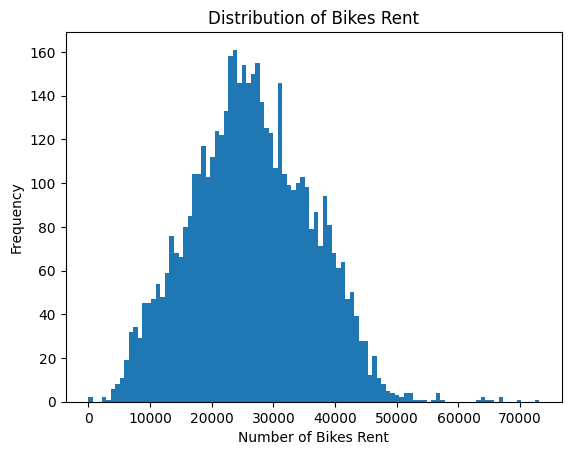

In [8]:
# Plot the distribution of bikes rented.
london_bikes_filled.hist('bikes_hired',bins=100,grid=False)
plt.title('Distribution of Bikes Rent')
plt.xlabel('Number of Bikes Rent')
plt.ylabel('Frequency')
plt.show()
#Comment: Ditribution of bike rents  very close to normal dstribution. 
# This is ggod for linear regression analysis but to make a better prediction, 
# data requires outlier elimination that helps to get much better normal ditribution 

The frequency of the bikerentals shows a normal distribution, which is a good indicator to build a linear regression model to predict the number of rentals.

/tmp/ipykernel_2638/3504955259.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = london_bikes_filled.groupby('season').agg( total = ('bikes_hired','sum'),
/tmp/ipykernel_2638/3504955259.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = london_bikes_filled.groupby('month').agg(total = ('bikes_hired','sum'),


Text(0, 0.5, 'Average Number of Bikes Rented')

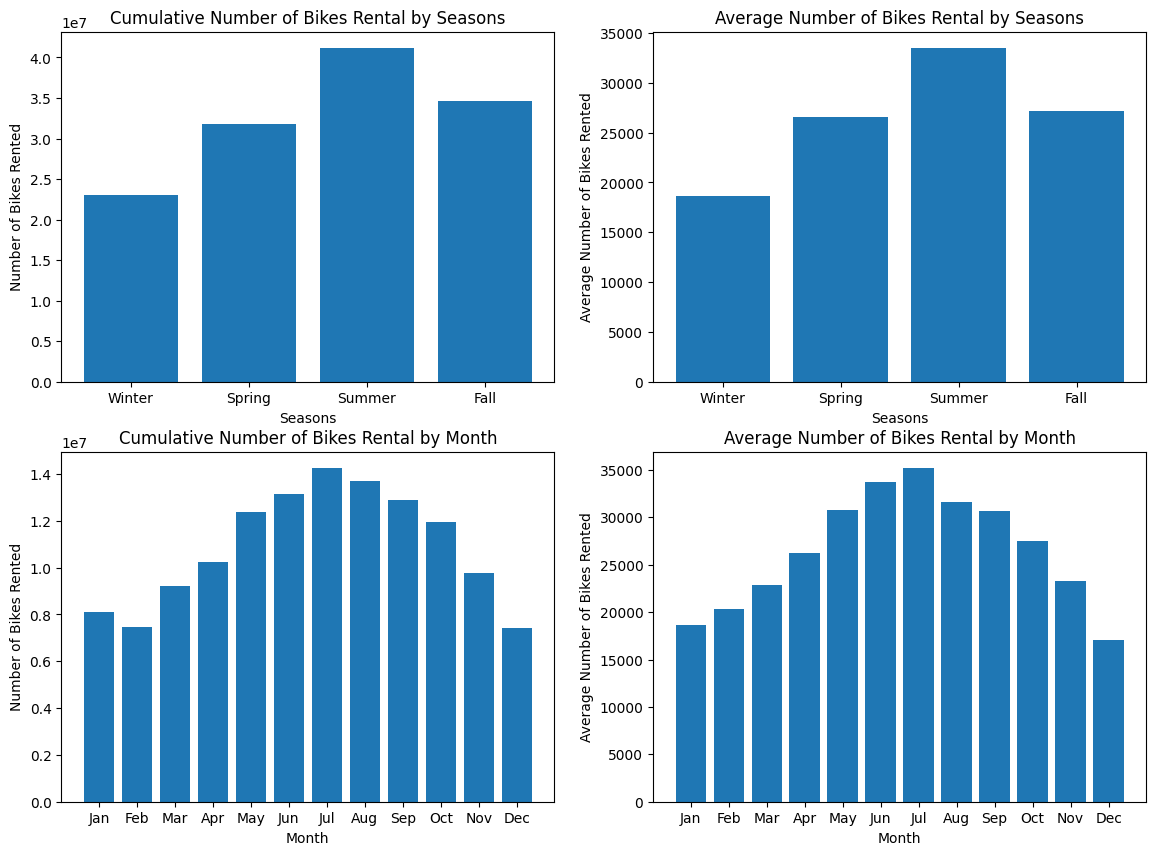

In [9]:
#Explore how rentals vary by season and month.

season_avg = london_bikes_filled.groupby('season').agg( total = ('bikes_hired','sum'),
                                          average = ('bikes_hired','mean')).reset_index()
monthly_avg = london_bikes_filled.groupby('month').agg(total = ('bikes_hired','sum'),
                                          average = ('bikes_hired','mean')).reset_index()


fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

axs[0,0].bar(season_avg.season.sort_values(),season_avg.total)
axs[0,0].set_title('Cumulative Number of Bikes Rental by Seasons')
axs[0,0].set_xlabel('Seasons')
axs[0,0].set_ylabel('Number of Bikes Rented')


axs[0,1].bar(season_avg.season.sort_values(),season_avg.average)
axs[0,1].set_title('Average Number of Bikes Rental by Seasons')
axs[0,1].set_xlabel('Seasons')
axs[0,1].set_ylabel('Average Number of Bikes Rented')


axs[1,0].bar(monthly_avg.month.sort_values(),monthly_avg.total)
axs[1,0].set_title('Cumulative Number of Bikes Rental by Month')
axs[1,0].set_xlabel('Month')
axs[1,0].set_ylabel('Number of Bikes Rented')


axs[1,1].bar(monthly_avg.month.sort_values(),monthly_avg.average)
axs[1,1].set_title('Average Number of Bikes Rental by Month')
axs[1,1].set_xlabel('Month')
axs[1,1].set_ylabel('Average Number of Bikes Rented')


Clearly, most bikes are rented in warmer months; peaking in July, having the bottom in December. On a dataset gathered on more than 10 years, we could see the seasonality if stretched out as a continuous line.

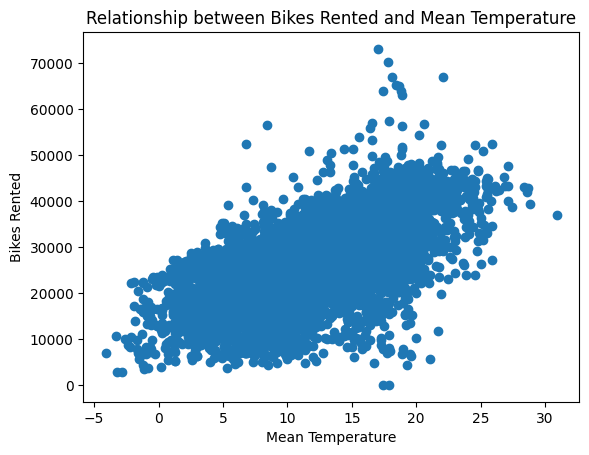

In [10]:
#Investigate the relationship between temperature and bikes rented.
plt.scatter(london_bikes_filled.mean_temp,london_bikes_filled.bikes_hired,)
plt.title('Relationship between Bikes Rented and Mean Temperature')
plt.xlabel('Mean Temperature')
plt.ylabel('Bikes Rented')
plt.show()

Based on the scatter plot above, we can see a forming upwards trend because of the relationship between temperature and the number of rented bikes.

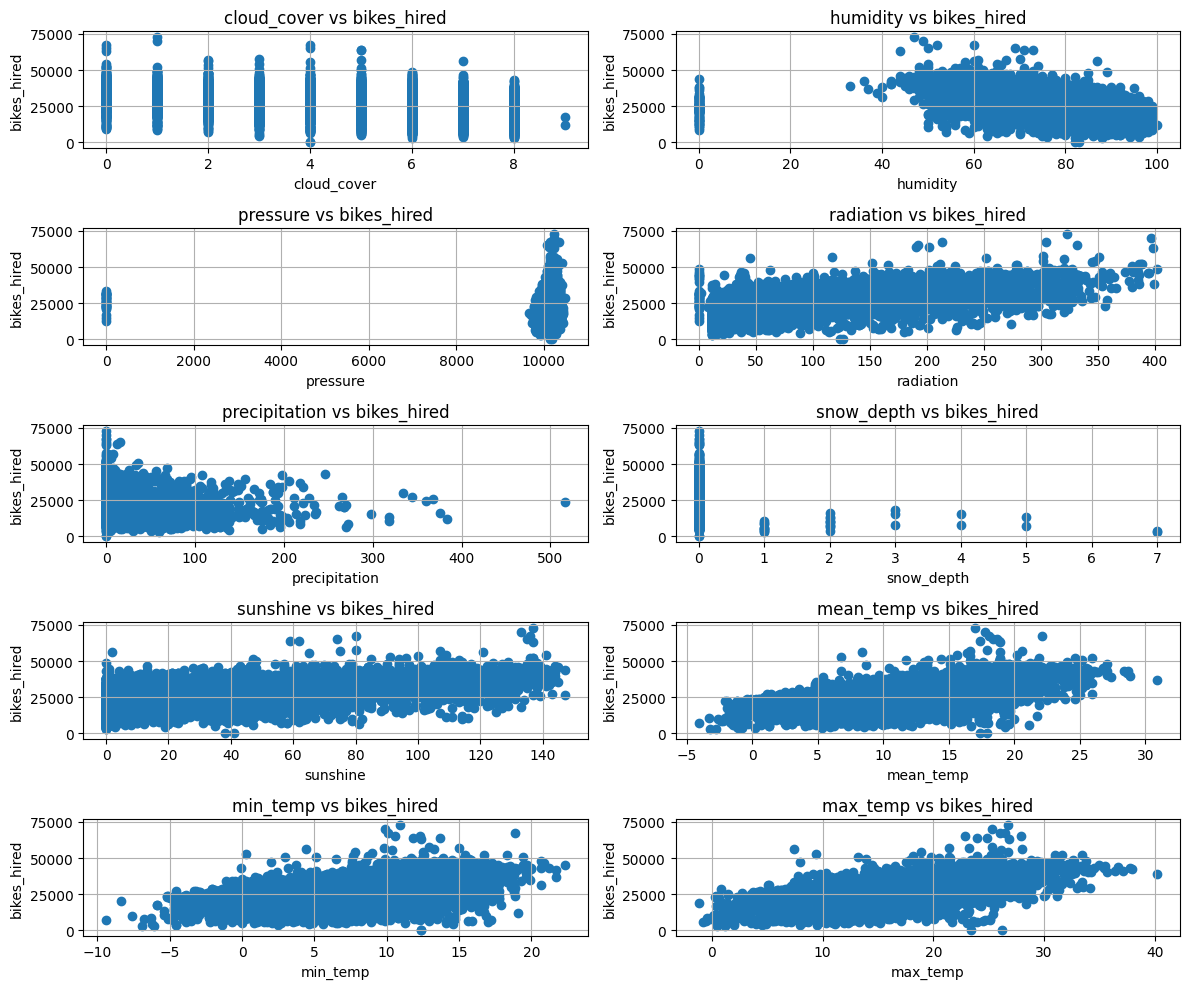

In [11]:
# Creating scatter plots for whole float type variables to exemine relationships between the target 

# Identify the target variable
target = 'bikes_hired'

# Create subplots: one row per variable (except y)
features = list()
for col in london_bikes_filled.columns:
    if col != target and london_bikes_filled[col].dtype == 'float64':
        features.append(col) 
n = len(features) # 10 

fig, axs = plt.subplots(5, 2, figsize=(12, 10))
axs = axs.flatten()  # Flatten to easily iterate

# Loop through features and plot
for i, feature in enumerate(features):
    axs[i].scatter(london_bikes_filled[feature], london_bikes_filled[target])
    axs[i].set_title(f'{feature} vs {target}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(target)
    axs[i].grid(True)

# If there are empty subplots (more slots than features), hide them
for j in range(len(features), len(axs)):
    fig.delaxes(axs[j])  # Removes unused axes

plt.tight_layout()
plt.show()




Out of curiousity, we checked out the other variables as well. 

/tmp/ipykernel_2638/114343382.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_grouped = [group['bikes_hired'].values for name, group in london_bikes_filled.groupby('season')]
/tmp/ipykernel_2638/114343382.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_grouped = [group['bikes_hired'].values for name, group in london_bikes_filled.groupby('month')]
/tmp/ipykernel_2638/114343382.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot(season_grouped, labels=s

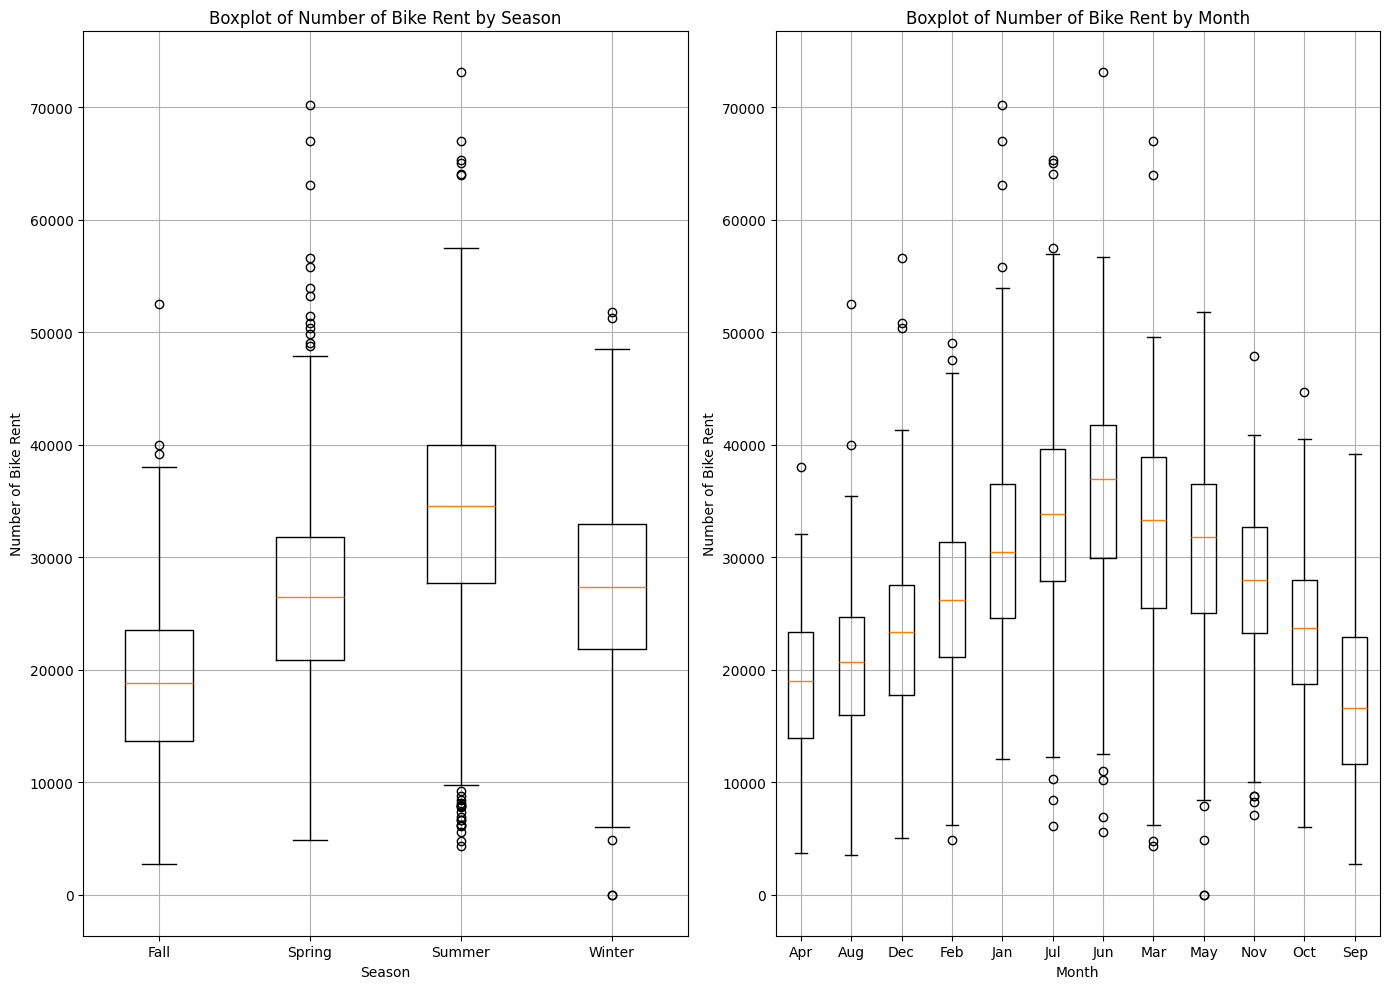

In [12]:
# Plot box-plots to investigate outliers 
fig, axs = plt.subplots(1, 2, figsize=(14, 10))  # 1 row, 2 columns

# Group data by 'season' and 'month' separately
season_grouped = [group['bikes_hired'].values for name, group in london_bikes_filled.groupby('season')]
month_grouped = [group['bikes_hired'].values for name, group in london_bikes_filled.groupby('month')]

# Boxplot by Season
axs[0].boxplot(season_grouped, labels=sorted(london_bikes_filled['season'].unique()))
axs[0].set_title("Boxplot of Number of Bike Rent by Season")
axs[0].set_xlabel("Season")
axs[0].set_ylabel("Number of Bike Rent")
axs[0].grid(True)

# Boxplot by Month
axs[1].boxplot(month_grouped, labels=sorted(london_bikes_filled['month'].unique()))
axs[1].set_title("Boxplot of Number of Bike Rent by Month")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Number of Bike Rent")
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()


Revealing the outliars: on the boxplot we can see that Spring contains more outliars on the upper side - meaning that there can be days in Spring months that gives more chances to rent a bike - while Summer months shows more outliars on the bottom - meaning that there are less popular days for bikes. Can this mean that temperature or rain has to do something with renting bikes?

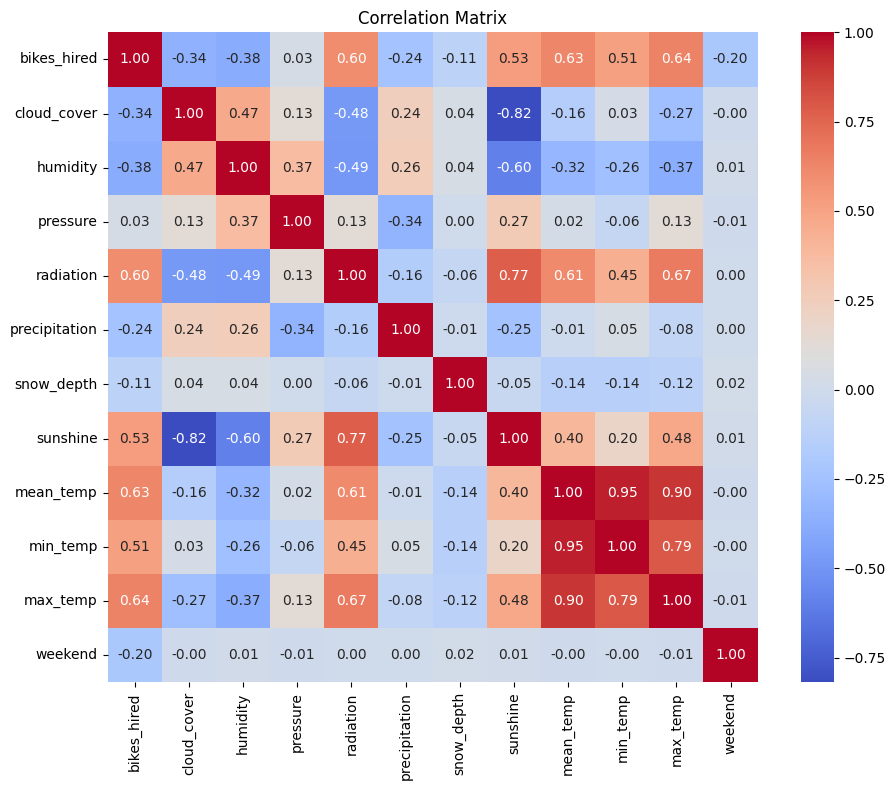

In [13]:
# Correlation matrix to check how variables are correlated with each other 
# Set plot size
corr_matrix = london_bikes_filled.corr(numeric_only=True)
plt.figure(figsize=(10, 8))

# Draw heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Significant values are above 0.5 or below -0.5. As multicolinearity is present, our aim is to highlight the core variables that are affecting the number of bikes hired a day, without going into details on the variables that are affecting each other (such as sunshine and radiation). Temperature in itself is the core variable, but radiation and humidity can further specify the result.

**3. Construct 95% confidence intervals for the mean number of bikes rented per season.**

Repeat the calculation per month.

Interpret the result:

What range of values do you expect the true mean to lie in?

Which seasons/months have higher or lower average demand?

Are there overlaps in the intervals, and what does that mean?

**Deliverables:**

A table or plot showing the mean and confidence intervals.

A short interpretation.

In [14]:
rentings = london_bikes_fill2['bikes_hired']

# STEP 1: What you observe (Sample Statistics)
sample_mean = rentings.mean()          # Calculate the sample mean (x̄)
sample_std = rentings.std()            # Calculate the sample standard deviation (s)
n = len(rentings)                      # Get the sample size (n)

# STEP 2: What you believe (Null Hypothesis)
mu_0 = 10000 # null hypothesis: H₀: μ = 10000 (we think average rented bike is 10000)
          # Alternative hypothesis: H₁: μ ≠ 10000 (two-sided test)

# STEP 3: Test statistic (t-statistic)
# Formula: t = (x̄ - μ₀) / (s / √n)
# This measures how many standard errors the sample mean is from the hypothesized mean
t_stat = (sample_mean - mu_0) / (sample_std / (n**0.5)) # n**0.5 means square root of n

# Degrees of freedom for t-distribution
df = n - 1  # df = sample size - 1

# STEP 4: Calculate p-value for two-sided test
# P-value = probability of observing a test statistic as extreme or more extreme
# For two-sided test: P(|T| >= |t_observed|) = 2 × P(T >= |t_observed|)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Display results
print(f"Sample size: {n}")
print(f"Sample mean: {sample_mean:.3f}")
print(f"Test statistic (t): {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation:
# If p_value < 0.05: Reject H₀ (evidence against μ = 7)
# If p_value >= 0.05: Fail to reject H₀ (insufficient evidence against μ = 7)
# test statistic can be negative or positive depending on whether sample mean is less than or greater than mu_0

Sample size: 4934
Sample mean: 26448.566
Test statistic (t): 119.387
P-value: 0.0000


/tmp/ipykernel_2638/4038710875.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_col)
/tmp/ipykernel_2638/4038710875.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_col)
/tmp/ipykernel_2638/4038710875.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_col)


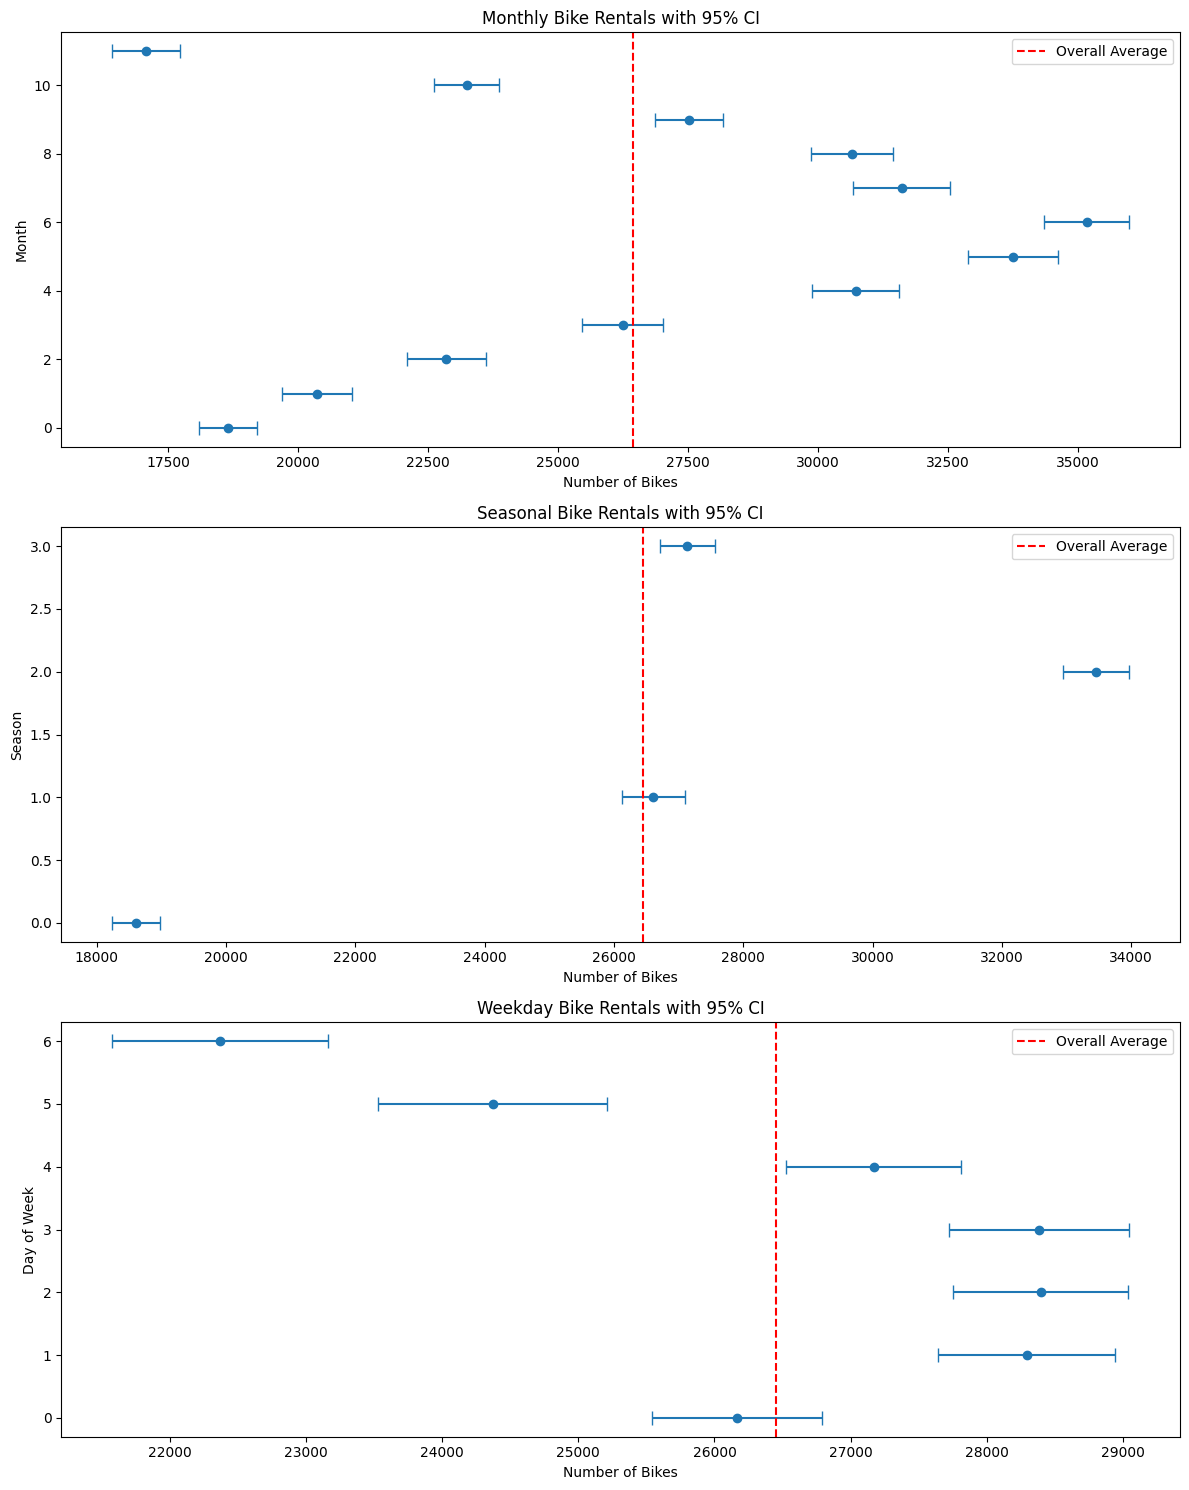

In [15]:
# Calculate overall average
overall_avg = london_bikes_fill2['bikes_hired'].mean()

# Calculate confidence intervals for different groupings
def calculate_ci(data, group_col):
    ci_stats = (
        data
        .groupby(group_col)
        .agg(
            mean_bikes=('bikes_hired', 'mean'),
            median_bikes=('bikes_hired', 'median'),
            sd_bikes=('bikes_hired', 'std'),
            count=('bikes_hired', 'size')
        )
        .reset_index()
    )
    
    # Calculate CI statistics
    ci_stats['t_critical'] = ci_stats['count'].apply(lambda n: stats.t.ppf(0.975, df=n-1))
    ci_stats['se_bikes'] = ci_stats['sd_bikes'] / np.sqrt(ci_stats['count'])
    ci_stats['margin_of_error'] = ci_stats['t_critical'] * ci_stats['se_bikes']
    ci_stats['ci_low'] = ci_stats['mean_bikes'] - ci_stats['margin_of_error']
    ci_stats['ci_high'] = ci_stats['mean_bikes'] + ci_stats['margin_of_error']
    
    return ci_stats.sort_values(by='mean_bikes', ascending=False)

# Calculate CIs for each grouping
month_ci = calculate_ci(london_bikes_fill2, 'month')
season_ci = calculate_ci(london_bikes_fill2, 'season')
weekday_ci = calculate_ci(london_bikes_fill2, 'wday')

# Visualize the results with error bars for each grouping
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot for months
ax1.errorbar(x=month_ci['mean_bikes'], y=month_ci.index, 
             xerr=month_ci['margin_of_error'], 
             fmt='o', capsize=5)
ax1.axvline(x=overall_avg, color='red', linestyle='--', label='Overall Average')
ax1.set_title('Monthly Bike Rentals with 95% CI')
ax1.set_xlabel('Number of Bikes')
ax1.set_ylabel('Month')
ax1.legend()

# Plot for seasons
ax2.errorbar(x=season_ci['mean_bikes'], y=season_ci.index,
             xerr=season_ci['margin_of_error'],
             fmt='o', capsize=5)
ax2.axvline(x=overall_avg, color='red', linestyle='--', label='Overall Average')
ax2.set_title('Seasonal Bike Rentals with 95% CI')
ax2.set_xlabel('Number of Bikes')
ax2.set_ylabel('Season')
ax2.legend()

# Plot for weekdays
ax3.errorbar(x=weekday_ci['mean_bikes'], y=weekday_ci.index,
             xerr=weekday_ci['margin_of_error'],
             fmt='o', capsize=5)
ax3.axvline(x=overall_avg, color='red', linestyle='--', label='Overall Average')
ax3.set_title('Weekday Bike Rentals with 95% CI')
ax3.set_xlabel('Number of Bikes')
ax3.set_ylabel('Day of Week')
ax3.legend()

plt.tight_layout()
plt.show()

* Months
Defining a true mean point, which describes the bikerental in general may be possible, but completely irrelevant - the graphs show us that from January to December the numbers of rental varies with almost no overlaps. Even the overlaps are indicated, since cold months rental are similar to each other, just as hot months rental are in their class.

* Seasons
By grouping by seasons, we can observe that spring and fall are very similar - again, similar attributes. On the other hand, summer and winter are far from each other. 

* Weekdays
Out of curiousity, we wanted to see the means on weekdays as well. This graph tells us that the strongest days are from Tuesday to Thursday (inclusively), while Monday and Friday are not performing too great. The weekends are totally weak.

* Summary
We think that we should approach each month on their own, or at least each season, when defining true mean lines. This is because there are very few overlaps with the true mean line - which indicates a spread data. Otherwise, the general mean line would be between 26 000 and 27 000 rentals per month.
Generally, summer months are doing far better then cold winter months, spring and fall are somewhere in the middle.

**Regression Analysis**

What variables influence the number of bikes rented (y) and how? Build a regression model that best explains the variability in bikes rented.

**Interpret:**

Which predictors are significant?

What do the coefficients mean (in practical terms)?

How much of the variation in bike rentals is explained (R²)?

**Deliverables:**

Regression output table.

A short discussion of which factors matter most for predicting bike rentals.

In [31]:
model0 = smf.ols('bikes_hired ~ sunshine', data=london_bikes_fill2).fit() 
model1 = smf.ols('bikes_hired ~ mean_temp', data=london_bikes_fill2).fit()
model2 = smf.ols('bikes_hired ~ humidity', data=london_bikes_fill2).fit() 
model3 = smf.ols('bikes_hired ~ precipitation', data=london_bikes_fill2).fit() 
model4 = smf.ols('bikes_hired ~ weekend', data=london_bikes_fill2).fit()  

model5 = smf.ols('bikes_hired ~ sunshine + mean_temp + precipitation + weekend + snow_depth + pressure' , data=london_bikes_fill2).fit() 

model6 = smf.ols('bikes_hired ~ sunshine', data=london_bikes_fill2).fit() 
print(model5.summary())



                            OLS Regression Results                            
Dep. Variable:            bikes_hired   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1038.
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:19:51   Log-Likelihood:                -50267.
No. Observations:                4934   AIC:                         1.005e+05
Df Residuals:                    4927   BIC:                         1.006e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -8.592e+04   9658.263     

In [17]:
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:            bikes_hired   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3150.
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:39:09   Log-Likelihood:                -51064.
No. Observations:                4934   AIC:                         1.021e+05
Df Residuals:                    4932   BIC:                         1.021e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.367e+04    251.773     54.311      0.0

In [18]:
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:            bikes_hired   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     2080.
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:39:09   Log-Likelihood:                -51414.
No. Observations:                4934   AIC:                         1.028e+05
Df Residuals:                    4932   BIC:                         1.028e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.217e+04    791.604     78.533      0.0

In [19]:
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:            bikes_hired   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     299.9
Date:                Tue, 23 Sep 2025   Prob (F-statistic):           2.92e-65
Time:                        15:39:09   Log-Likelihood:                -52137.
No. Observations:                4934   AIC:                         1.043e+05
Df Residuals:                    4932   BIC:                         1.043e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       2.75e+04    146.938    187.160

In [20]:
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:            bikes_hired   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 23 Sep 2025   Prob (F-statistic):           2.89e-46
Time:                        15:39:09   Log-Likelihood:                -52181.
No. Observations:                4934   AIC:                         1.044e+05
Df Residuals:                    4932   BIC:                         1.044e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.768e+04    159.704    1

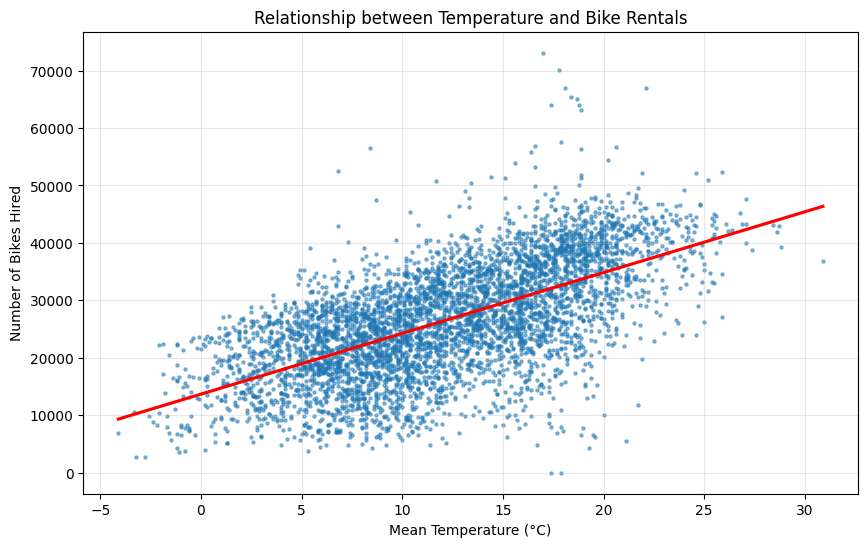

In [21]:
# Create a regression plot for bikes vs temperature
plt.figure(figsize=(10, 6))
sns.regplot(
    data=london_bikes_fill2,
    x='mean_temp',
    y='bikes_hired',
    scatter_kws={'s': 5, 'alpha': 0.5},  # Small, semi-transparent points
    line_kws={'color': 'red'},           # Red regression line
    ci=None                              # No confidence interval band
)
plt.title('Relationship between Temperature and Bike Rentals')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Number of Bikes Hired')
plt.grid(True, alpha=0.3)
plt.show()

## Deliverables
A knitted HTML, one person per group to submit





****4. REGRESSION ANALYSIS****


Which predictors are significant?

The regression shows that all predictors except cloud_cover are statistically significant (p < 0.05), so we reject the null hypothesis (H₀) for every variable except cloud_cover. The strongest contributors to explanatory power are sunshine and temperature, which substantially increase the adjusted R². Precipitation also improves the model, while precipitation, snow_depth and the weekend dummy add only marginal gains in terms of explained variance. 

Even if they are statisticaly significant (p-value>0,05), we decided to remove humidity and radiation due to their high correlation with other variables (sunshine in particular) that explains more the bikes rental's variance (according to the correlation table in the EDA section). 

What do the coefficients mean (in practical terms)?

The coefficients show how the dependent variable (bike rentals) changes when a predictor increases by one unit, holding all other variables constant. A positive coefficient means the predictor increases rentals, while a negative one means it decreases them. 

The weekend dummy explains little of the overall variability compared to weather factors, it still has a large practical effect: bike rentals drop by about 4,300 units on weekends on average. We observe the same type of effect for snow depth: while it explains little of the global variance, it has a large negative coefficient (−1156 by centimeters of snow), showing that snowy days sharply reduce rentals.

How much of the variation in bike rentals is explained (R²)?

Around 57% of the global variance of bike rentals is explained by our model (adjusted R2)

